# Семинар "Свёрточные нейронные сети"

# Cвёрточные нейронные сети

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import sklearn
import PIL


def show_image(image, figsize=(16, 9), reverse=True):
    plt.figure(figsize=figsize)
    if reverse:
        plt.imshow(image[...,::-1])
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    
def show_grayscale_image(image, figsize=(16, 9)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [2]:
import torch
import torchvision

In [3]:
layer = torch.nn.Conv2d(1, 1, kernel_size=(3, 3))

In [4]:
layer.weight

Parameter containing:
tensor([[[[-0.2055,  0.1528,  0.3318],
          [ 0.1544,  0.2050, -0.2973],
          [-0.1075,  0.2532, -0.2549]]]], requires_grad=True)

In [5]:
# вес доступен через .weight.data
layer.weight.data = torch.ones_like(layer.weight.data) 
layer.weight.data /= torch.sum(layer.weight.data)

In [7]:
layer.weight.data

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])

In [8]:
layer.bias.data = torch.zeros_like(layer.bias.data)

In [9]:
layer.train()

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [10]:
layer.eval()

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [11]:
input_tensor = torch.arange(9).reshape(1, 1, 3, 3)

In [12]:
input_tensor.shape

torch.Size([1, 1, 3, 3])

In [13]:
input_tensor

tensor([[[[0, 1, 2],
          [3, 4, 5],
          [6, 7, 8]]]])

In [ ]:
64, 3, 1080, 1920

1 - размер батча
1 - кол-во каналов (1, если черно-белый, 3, если цветной)
3 - высота
3 - ширина

In [14]:
input_tensor

tensor([[[[0, 1, 2],
          [3, 4, 5],
          [6, 7, 8]]]])

In [15]:
output_tensor = layer(input_tensor.float())

In [16]:
output_tensor

tensor([[[[4.]]]], grad_fn=<ConvolutionBackward0>)

In [17]:
output_tensor.shape

torch.Size([1, 1, 1, 1])

## Модификация весов свертки

In [18]:
path = '../data/photos/cat.png'

In [19]:
# читаем изображение
img = cv2.imread(path, 0)

In [21]:
img.shape

(600, 1200)

In [22]:
img.min()

0

In [23]:
img.max()

255

In [24]:
img.shape

(600, 1200)

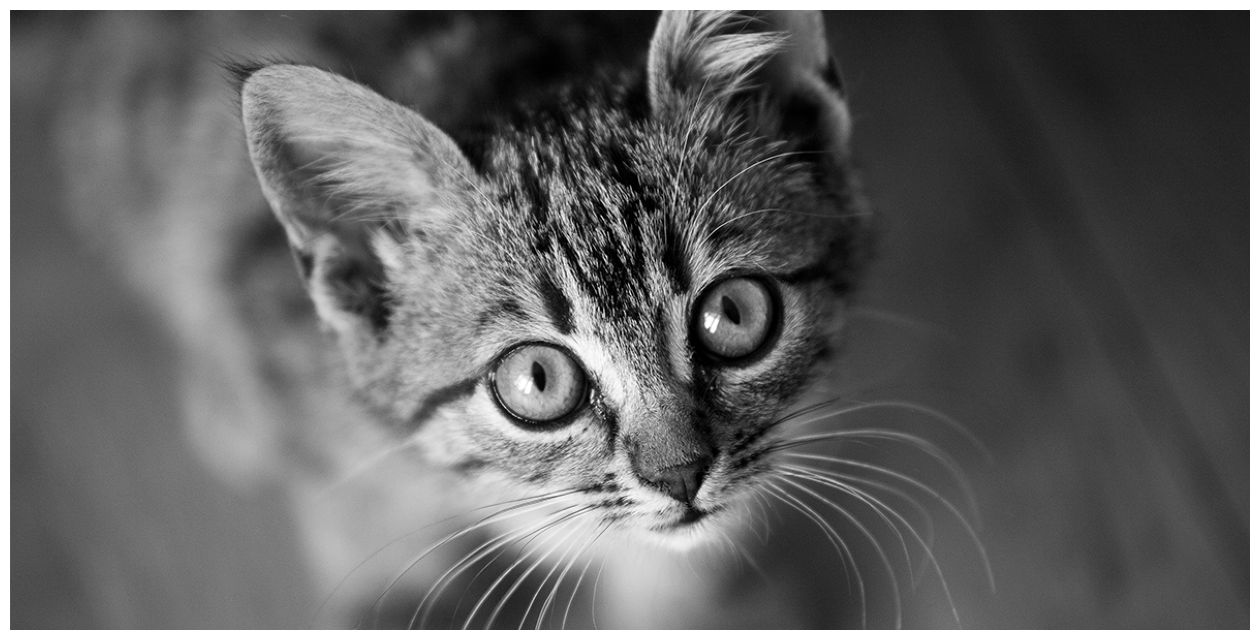

In [25]:
show_grayscale_image(img)

In [26]:
to_tensor = torchvision.transforms.ToTensor()

In [27]:
img_tensor = to_tensor(img)

In [28]:
img_tensor

tensor([[[0.1882, 0.1451, 0.1294,  ..., 0.1059, 0.0980, 0.0941],
         [0.1882, 0.1529, 0.1529,  ..., 0.0863, 0.0902, 0.1020],
         [0.1804, 0.1412, 0.1490,  ..., 0.0941, 0.0941, 0.0902],
         ...,
         [0.3333, 0.2863, 0.2941,  ..., 0.2706, 0.2745, 0.2745],
         [0.3216, 0.2863, 0.2824,  ..., 0.2863, 0.2706, 0.2784],
         [0.3373, 0.2980, 0.3059,  ..., 0.2706, 0.2588, 0.2863]]])

In [29]:
img_tensor.min()

tensor(0.)

In [30]:
img_tensor.max()

tensor(1.)

In [31]:
img_tensor.shape

torch.Size([1, 600, 1200])

In [32]:
img_tensor = img_tensor.reshape((1, 1, 600, 1200))

In [33]:
assert img_tensor.shape == torch.Size([1, 1, 600, 1200])

## Создадим свертку, которая размоет изображение

In [34]:
kernel_size = 50
layer = torch.nn.Conv2d(1, 1, kernel_size=kernel_size)

In [35]:
layer.weight.data = torch.ones_like(layer.weight.data) 
layer.weight.data /= torch.sum(layer.weight.data)

In [36]:
layer.weight.data

tensor([[[[0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
          [0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
          [0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
          ...,
          [0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
          [0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
          [0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004]]]])

In [37]:
layer.weight.data.shape

torch.Size([1, 1, 50, 50])

In [38]:
layer.eval()

Conv2d(1, 1, kernel_size=(50, 50), stride=(1, 1))

In [39]:
output_tensor = layer(img_tensor)

In [41]:
img_tensor.shape

torch.Size([1, 1, 600, 1200])

In [40]:
output_tensor.shape

torch.Size([1, 1, 551, 1151])

In [42]:
import torchvision.transforms as transforms

# функция, переводящее тензор в PIL-изображение
to_pil_image = transforms.ToPILImage()

In [43]:
output_img = to_pil_image(output_tensor.squeeze(0))

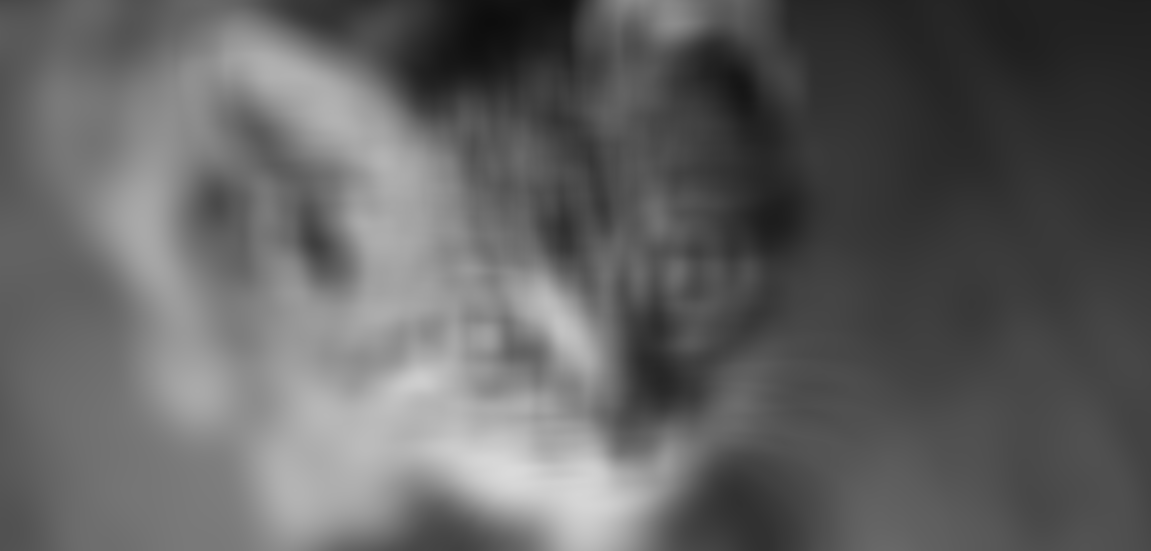

In [44]:
output_img

# Обучие моделей на изображениях

## Данные, преобразования

In [45]:
import torch
import torchvision
import torchvision.transforms as transforms

In [46]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [47]:
batch_size = 4

# dataset задаёт данные
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
# dataloader подгружает их
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Отрисовка

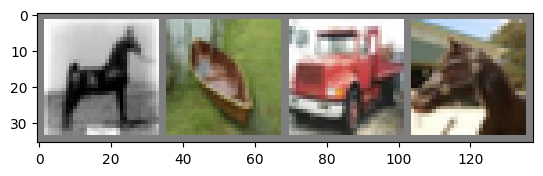

horse  ship  truck  horse


In [48]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


images, labels = next(iter(trainloader))

imshow(torchvision.utils.make_grid(images))
print('  '.join('{}'.format(classes[labels[j]]) for j in range(4)))

## Рутина обучения модели

In [49]:
def train_model(net, criterion, optimizer, trainloader, num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 2000 == 1999:
                print('Epoch {0}/{1}, iteration {2}, loss: {3:.3f}'.format(epoch + 1, num_epochs, i + 1, 
                                                                          running_loss / 2000))
                running_loss = 0.0
        print()

    print('Finished Training')
    
    return net

## Точность модели на тестовом сете

In [50]:
def all_accuracy(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(
        100 * correct / total))

In [51]:
def class_accuracy(net, testloader):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of {} : {} %'.format(
            classes[i], 100 * class_correct[i] / class_total[i]))

## Полносвязная сеть для классификации

In [52]:
import torch.nn as nn
import torch.nn.functional as F

# созлайте сеть, состоящую из 3-х полносвязных слоёв (input_size -> 128, 128 -> 32, 32 -> output_size) 
# и испрользовала в качестве активции ReLU

class FeedForwardNet(nn.Module):
    def __init__(self):
        super(FeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)
        
    def forward(self, x):
        # используем функцию view для преобразования входа
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x
    
net = FeedForwardNet()

In [53]:
import torch.optim as optim

net = FeedForwardNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [54]:
net = train_model(net, criterion, optimizer, trainloader, num_epochs=5)

Epoch 1/5, iteration 2000, loss: 1.959
Epoch 1/5, iteration 4000, loss: 1.740
Epoch 1/5, iteration 6000, loss: 1.669
Epoch 1/5, iteration 8000, loss: 1.618
Epoch 1/5, iteration 10000, loss: 1.588
Epoch 1/5, iteration 12000, loss: 1.580

Epoch 2/5, iteration 2000, loss: 1.507
Epoch 2/5, iteration 4000, loss: 1.484
Epoch 2/5, iteration 6000, loss: 1.494


KeyboardInterrupt: 

In [55]:
all_accuracy(net, testloader)

Accuracy of the network on the 10000 test images: 45.61 %


In [56]:
class_accuracy(net, testloader)

Accuracy of plane : 52.4 %
Accuracy of car : 60.1 %
Accuracy of bird : 49.0 %
Accuracy of cat : 30.4 %
Accuracy of deer : 36.2 %
Accuracy of dog : 24.6 %
Accuracy of frog : 53.5 %
Accuracy of horse : 49.2 %
Accuracy of ship : 66.9 %
Accuracy of truck : 33.8 %


## Свёрточная сеть для классификации

In [57]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [58]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [59]:
net = train_model(net, criterion, optimizer, trainloader, num_epochs=5)

Epoch 1/5, iteration 2000, loss: 2.162
Epoch 1/5, iteration 4000, loss: 1.837
Epoch 1/5, iteration 6000, loss: 1.670
Epoch 1/5, iteration 8000, loss: 1.583
Epoch 1/5, iteration 10000, loss: 1.521
Epoch 1/5, iteration 12000, loss: 1.476

Epoch 2/5, iteration 2000, loss: 1.387
Epoch 2/5, iteration 4000, loss: 1.367
Epoch 2/5, iteration 6000, loss: 1.325


KeyboardInterrupt: 

In [60]:
# сохраним сеть
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [61]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('{}'.format(classes[labels[j]]) for j in range(batch_size)))

AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute 'next'

In [62]:
# загрузим сеть
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [63]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('{}'.format(classes[predicted[j]]) for j in range(4)))

Predicted:  horse frog car horse


In [64]:
all_accuracy(net, testloader)

Accuracy of the network on the 10000 test images: 54.39 %


In [65]:
class_accuracy(net, testloader)

Accuracy of plane : 74.9 %
Accuracy of car : 73.1 %
Accuracy of bird : 43.1 %
Accuracy of cat : 40.1 %
Accuracy of deer : 35.6 %
Accuracy of dog : 30.2 %
Accuracy of frog : 64.3 %
Accuracy of horse : 68.8 %
Accuracy of ship : 60.4 %
Accuracy of truck : 53.4 %


In [ ]:
Accuracy of plane : 52.4 %
Accuracy of car : 60.1 %
Accuracy of bird : 49.0 %
Accuracy of cat : 30.4 %
Accuracy of deer : 36.2 %
Accuracy of dog : 24.6 %
Accuracy of frog : 53.5 %
Accuracy of horse : 49.2 %
Accuracy of ship : 66.9 %
Accuracy of truck : 33.8 %